## Installing Touch:

In [3]:
!pip install torch

## Import necessary libraries

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

## Define an empty list for RMSE

In [5]:
rmse_list = []
print(rmse_list)

[]



## Define the function to plot training loss

In [6]:
def plot_training_loss(loss_list):
    plt.plot(loss_list)
    plt.title("Model Training")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


    
 ## Define the function to plot test RMSE variation

In [7]:
def plot_rmse(rmse_list):
    plt.plot(rmse_list)
    plt.title("Test RMSE Variation with Increasing Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("RMSE")
    plt.show()
 

## Load data

In [8]:
train_data = np.loadtxt("TrainData.csv")
train_labels = np.loadtxt("TrainLabels.csv")
test_data = np.loadtxt("TestData.csv")

## Preprocess data

In [9]:
train_data_mean = np.mean(train_data, axis=0)
train_data_std = np.std(train_data, axis=0)
train_data = (train_data - train_data_mean) / train_data_std
test_data = (test_data - train_data_mean) / train_data_std

## Define the neural network

In [10]:
class NeuralNet(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Define the function to calculate RMSE

In [11]:
def calculate_rmse(predictions, labels):
    mse = nn.MSELoss()
    rmse = torch.sqrt(mse(predictions, labels))
    return rmse.item()

## Define hyperparameters

In [12]:
input_dim = 8
output_dim = 1
hidden_dim = 32
learning_rate = 0.01
batch_size = 32
num_epochs = 100
lambda_L1 = 0.01

## Define the model, optimizer and scheduler

In [13]:
model = NeuralNet(input_dim, output_dim, hidden_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L1)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

## Evaluate the performance on test data

In [32]:
test_dataset = TensorDataset(torch.from_numpy(test_data).float())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
test_predictions = []
test_labels = torch.from_numpy(np.loadtxt("TestLabels.csv")).float()
with torch.no_grad():
    for batch_data in test_loader:
        batch_predictions = model(batch_data[0])
        test_predictions.append(batch_predictions)
test_predictions = torch.cat(test_predictions, dim=0)
rmse = calculate_rmse(test_predictions, test_labels)
rmse_list.append(rmse)
print(rmse_list)
print("Test RMSE: {:.4f}".format(rmse))

[36.38914489746094, 21.270885467529297, 21.270885467529297, 21.270885467529297, 21.270885467529297, 21.270885467529297]
Test RMSE: 21.2709


## Define loss function

In [15]:
criterion = nn.MSELoss()


## Define data loader

In [16]:
train_dataset = TensorDataset(torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).float())
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

## Define the model, optimizer and scheduler

In [17]:
model = NeuralNet(input_dim, output_dim, hidden_dim)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=lambda_L1)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

## Train the model

In [22]:
loss_list = []
rmse = []
for epoch in range(num_epochs):
    epoch_loss = 0
    for batch_data, batch_labels in train_loader:
        optimizer.zero_grad()
        batch_predictions = model(batch_data)
        batch_loss = criterion(batch_predictions, batch_labels.unsqueeze(1))

        # Define L1 Regularization
        l1_reg = nn.L1Loss()
        l1_loss = 0
        for param in model.parameters():
            l1_loss += torch.norm(param, p=1)
        batch_loss += lambda_L1 * l1_loss
        
        epoch_loss += batch_loss.item()
        batch_loss.backward()
        optimizer.step()

    loss_list.append(epoch_loss)
    scheduler.step(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1, num_epochs, batch_loss.item()))

Epoch 00108: reducing learning rate of group 0 to 1.0000e-06.
Epoch [10/100], Loss: 24.3372
Epoch 00115: reducing learning rate of group 0 to 1.0000e-07.
Epoch [20/100], Loss: 26.4510
Epoch 00125: reducing learning rate of group 0 to 1.0000e-08.
Epoch [30/100], Loss: 32.6039
Epoch [40/100], Loss: 22.5526
Epoch [50/100], Loss: 41.7913
Epoch [60/100], Loss: 36.0765
Epoch [70/100], Loss: 23.1437
Epoch [80/100], Loss: 21.4537
Epoch [90/100], Loss: 32.0535
Epoch [100/100], Loss: 40.5860


## Save the model

In [23]:
torch.save(model.state_dict(), "MSCS22058_Model.pkl")

## Evaluate the performance on test data

In [24]:
test_dataset = TensorDataset(torch.from_numpy(test_data).float())
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
model.eval()
test_predictions = []
with torch.no_grad():
    for batch_data in test_loader:
        batch_predictions = model(batch_data[0])

## Plot the test RMSE variation

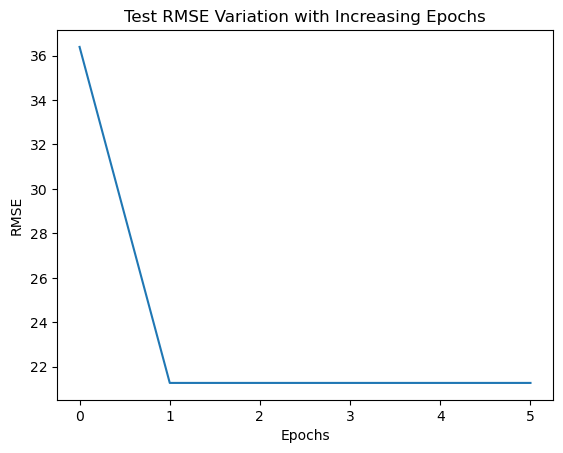

[36.38914489746094, 21.270885467529297, 21.270885467529297, 21.270885467529297, 21.270885467529297, 21.270885467529297]


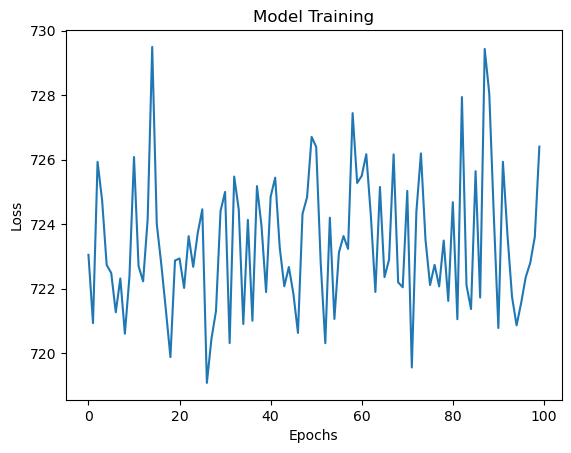

In [33]:
plot_rmse(rmse_list)
print(rmse_list)
plot_training_loss(loss_list)